<a href="https://colab.research.google.com/github/navidyamini/TensorFlow2.0_Codes/blob/main/code/TF2_0_SimpleRNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

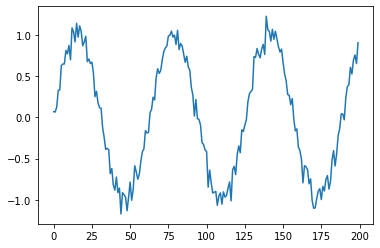

In [2]:
# make the priginal data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
# plot it
plt.plot(series)
plt.show()

In [3]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [16]:
### try autoregresssive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(5,activation='relu')(i) # SimpleRNN(5,activation=None)(i) # (i)SimpleRNN(5,activation='relu')(i) #SimpleRNN(5)(i) 
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)
# train the RNN
r = model.fit(
    X[:-N//2], Y[:N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 3s 153ms/step - loss: 0.8726 - val_loss: 0.1969
Epoch 2/80
3/3 [==============================] - 0s 25ms/step - loss: 0.2919 - val_loss: 0.4725
Epoch 3/80
3/3 [==============================] - 0s 25ms/step - loss: 0.5878 - val_loss: 0.5004
Epoch 4/80
3/3 [==============================] - 0s 21ms/step - loss: 0.5797 - val_loss: 0.4483
Epoch 5/80
3/3 [==============================] - 0s 22ms/step - loss: 0.4721 - val_loss: 0.4117
Epoch 6/80
3/3 [==============================] - 0s 29ms/step - loss: 0.3776 - val_loss: 0.4175
Epoch 7/80
3/3 [==============================] - 0s 35ms/step - loss: 0.3534 - val_loss: 0.4482
Epoch 8/80
3/3 [==============================] - 0s 24ms/step - loss: 0.3467 - val_loss: 0.4575
Epoch 9/80
3/3 [==============================] - 0s 25ms/step - loss: 0.3301 - val_loss: 0.4179
Epoch 10/80
3/3 [==============================] - 0s 30ms/step - loss: 0.2873 - val_loss: 0.3375
Epoch 11/80
3/3 [======================

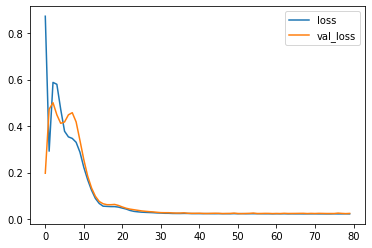

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [18]:
# "Wring" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions=[]

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

1/1 [==============================] - 0s 32ms/step


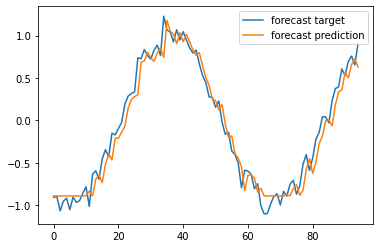

In [19]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [20]:
# Forecast future values (use only self-predictions for making futire predictions)
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):

  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 24ms/step


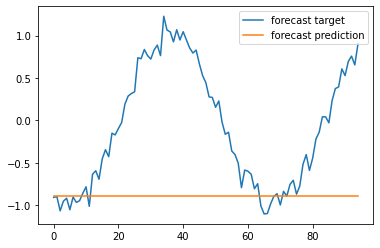

In [21]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()